In [1]:
from federated_learning import Configuration
from federated_learning import Client

In [2]:
config = Configuration()
data = config.DATASET(config)
client = Client(config, data.train_dataloader, data.test_dataloader)

MNIST training data loaded.
MNIST test data loaded.


In [7]:
import torch
evens = list(range(0, len(data.train_dataset), 2))
odds = list(range(1, len(data.train_dataset), 2))
trainset_1 = torch.utils.data.Subset(data.train_dataset, evens)
trainset_2 = torch.utils.data.Subset(data.train_dataset, odds)
trainloader_1 = torch.utils.data.DataLoader(trainset_1, batch_size=config.BATCH_SIZE_TRAIN,
                                            shuffle=True, num_workers=2)
trainloader_2 = torch.utils.data.DataLoader(trainset_2, batch_size=config.BATCH_SIZE_TRAIN,
                                            shuffle=True, num_workers=2)

In [12]:
print(len(data.train_dataloader))
print(len(trainloader_1))
examples = enumerate(trainloader_1)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

938
469


torch.Size([64, 1, 28, 28])

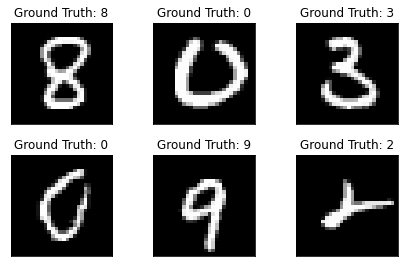

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])